In [75]:
from bs4 import BeautifulSoup as soup # Beautiful Soup is a Python library for getting data out of HTML, XML, and other markup languages
from urllib.request import Request, urlopen # request is a Python module for fetching URLs
import pandas as pd
import numpy as np
from datetime import date, datetime
import matplotlib.pyplot as plt

In [73]:
fname = "https://www.google.com/search?q=covid-19&rlz=1C1JZAP_enIN935IN935&oq=covi&aqs=chrome.3.69i59j69i57j69i59j0i67j0i67i457j0i402j69i60j69i65.3124j0j7&sourceid=chrome&ie=UTF-8"
req = Request(fname, headers={'Upgrade-Insecure-Requests': '1',
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/95.0.4638.54 Safari/537.36'}) 
# Mozilla/5.0 is the general token that says the browser is Mozilla-compatible. 
webpage = urlopen(req)
page_soup = soup(webpage, "html.parser")

In [52]:
#List of all the links used in the website
i=1;
for a in page_soup.find_all('a', href=True):
    print("URL", i, ":", a['href']);
    i+=1;

URL 1 : /?sa=X&ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQOwgC
URL 2 : /?rlz=1C1JZAP_enIN935IN935&output=search&sa=X&ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQPAgE
URL 3 : /search?q=covid-19&rlz=1C1JZAP_enIN935IN935&gbv=1&sei=Iw2IYfaJAc6Oxc8Pg8WaoAI
URL 4 : /search?q=covid-19&rlz=1C1JZAP_enIN935IN935&source=lnms&tbm=nws&sa=X&ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUICCgB
URL 5 : /search?q=covid-19&rlz=1C1JZAP_enIN935IN935&source=lnms&tbm=isch&sa=X&ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUICSgC
URL 6 : /search?q=covid-19&rlz=1C1JZAP_enIN935IN935&source=lnms&tbm=vid&sa=X&ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUICigD
URL 7 : https://maps.google.com/maps?q=covid-19&rlz=1C1JZAP_enIN935IN935&ucbcb=1&um=1&ie=UTF-8&sa=X&ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUICygE
URL 8 : /search?q=covid-19&rlz=1C1JZAP_enIN935IN935&source=lnms&tbm=shop&sa=X&ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUIDCgF
URL 9 : /search?q=covid-19&rlz=1C1JZAP_enIN935IN935&source=lnms&tbm=bks&sa=X&ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUIDSg

<div id="main">
 <div>
  <div class="KP7LCb">
   <div class="bRsWnc">
    <div class="N6RWV">
     <div class="Pg70bf Uv67qb">
      <span class="OXXup">
       All
      </span>
      <a class="eZt8xd" href="/search?q=covid-19&amp;rlz=1C1JZAP_enIN935IN935&amp;source=lnms&amp;tbm=nws&amp;sa=X&amp;ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUICCgB">
       News
      </a>
      <a class="eZt8xd" href="/search?q=covid-19&amp;rlz=1C1JZAP_enIN935IN935&amp;source=lnms&amp;tbm=isch&amp;sa=X&amp;ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUICSgC">
       Images
      </a>
      <a class="eZt8xd" href="/search?q=covid-19&amp;rlz=1C1JZAP_enIN935IN935&amp;source=lnms&amp;tbm=vid&amp;sa=X&amp;ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUICigD">
       Videos
      </a>
      <a href="https://maps.google.com/maps?q=covid-19&amp;rlz=1C1JZAP_enIN935IN935&amp;ucbcb=1&amp;um=1&amp;ie=UTF-8&amp;sa=X&amp;ved=0ahUKEwi2p87T44b0AhVOR_EDHYOiBiQQ_AUICygE">
       Maps
      </a>
      <a href="/search?q=covid-19&amp;rlz=1C
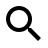

In [5]:
main=page_soup.find(id="main")
print(main.prettify())

In [28]:
for info in page_soup.find_all('h3'):
    print(info.text)

Coronavirus (COVID-19) - NHS
Coronavirus Cases - Worldometer
Coronavirus disease (COVID-19) - WHO | World Health Organization
UK Summary | Coronavirus (COVID-19) in the UK
Symptoms of COVID-19 | CDC
Coronavirus (COVID-19): guidance and support - GOV.UK
COVID-19 - ECDC - europa.eu
COVID-19 situation update worldwide, as of week 43 ... - ECDC
COVID-19 - Wikipedia


List of all the titles in the query search

In [109]:
title = [title.text for title in page_soup.findAll('h3', {'class': 'LC20lb DKV0Md'})]
for t in title:
    print(t,"\n")

Coronavirus (COVID-19) - NHS 

Coronavirus disease (COVID-19) - WHO | World Health ... 

Symptoms of COVID-19 | CDC 

Coronavirus (COVID-19) in the UK: UK Summary 

Coronavirus (COVID-19): guidance and support - GOV.UK 

COVID-19 - ECDC - europa.eu 

COVID-19 situation update worldwide, as of week 43 ... - ECDC 

COVID-19 - Wikipedia 

250271636 Cases and 5060167 Deaths from the Coronavirus 

COVID-19 | Topic | NICE 



List of all the links in the query search

In [110]:
link = [link.next_element['href'] for link in page_soup.findAll('div', {'class': 'yuRUbf'})]
for l in link:
    print(l,"\n")

https://www.nhs.uk/conditions/coronavirus-covid-19/ 

https://www.who.int/health-topics/coronavirus 

https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html 

https://coronavirus.data.gov.uk/ 

https://www.gov.uk/coronavirus 

https://www.ecdc.europa.eu/en/covid-19 

https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases 

https://en.wikipedia.org/wiki/COVID-19 

https://www.worldometers.info/coronavirus/?utm_campaign=homeAdvegas1? 

https://www.nice.org.uk/covid-19 



List of all the text descriptions in the query search

In [111]:
description = [descr.text for descr in page_soup.findAll('div', {'class': 'VwiC3b yXK7lf MUxGbd yDYNvb lyLwlc lEBKkf'})]
for d in description:
    print(d,"\n")

NHS advice about coronavirus (COVID-19), including information on symptoms, testing, vaccination and self-isolation. 

Coronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Most people infected with the virus will experience mild to moderate ... 

Learn about common COVID-19 symptoms, when symptoms may appear, and when to seek emergency medical care. 

Official Coronavirus (COVID-19) disease situation dashboard with latest data in the UK. 

Coronavirus (COVID‑19). Coronavirus remains a serious health risk. You should stay cautious to help protect yourself and others. 

See all information on COVID-19, situation updates, risk assessments, questions and answers, latest evidence, surveillance and laboratory guidance and how ... 

Coronavirus disease 2019 (COVID-19) is a contagious disease caused by severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2). 

All NICE products on COVID-19. Includes any guidance and advice. 



In [123]:
#Iterate through each block of the search result
text = [descr.text for descr in page_soup.findAll('div', {'class': 'tF2Cxc'})]
for t in text:
    print(t,"\n")

Coronavirus (COVID-19) - NHShttps://www.nhs.uk › conditions › coronavirus-covid-19https://www.nhs.uk › conditions › coronavirus-covid-19NHS advice about coronavirus (COVID-19), including information on symptoms, testing, vaccination and self-isolation.‎NHS COVID Pass · ‎Self-isolation and treating... · ‎Book a vaccination · ‎Vaccination 

Coronavirus disease (COVID-19) - WHO | World Health ...https://www.who.int › Health topicshttps://www.who.int › Health topicsCoronavirus disease (COVID-19) is an infectious disease caused by the SARS-CoV-2 virus. Most people infected with the virus will experience mild to moderate ...‎COVID-19 vaccines available · ‎Technical guidance publications · ‎Considerations 

Symptoms of COVID-19 | CDChttps://www.cdc.gov › 2019-ncov › symptoms-testinghttps://www.cdc.gov › 2019-ncov › symptoms-testingLearn about common COVID-19 symptoms, when symptoms may appear, and when to seek emergency medical care.‎Coronavirus Self-Checker · ‎Caring for Someone · ‎Understan

In [138]:
text = [page_soup.findAll('div', {'class': 'tF2Cxc'})]
for t in text:
    print(t,"\n")

[<div class="tF2Cxc"><div class="yuRUbf"><a data-ved="2ahUKEwixptOWiIf0AhVKUcAKHTuICXYQFnoECAgQAQ" href="https://www.nhs.uk/conditions/coronavirus-covid-19/" ping="/url?sa=t&amp;source=web&amp;rct=j&amp;url=https://www.nhs.uk/conditions/coronavirus-covid-19/&amp;ved=2ahUKEwixptOWiIf0AhVKUcAKHTuICXYQFnoECAgQAQ"><br/><h3 class="LC20lb DKV0Md">Coronavirus (COVID-19) - NHS</h3><div class="TbwUpd NJjxre"><cite class="iUh30 qLRx3b tjvcx">https://www.nhs.uk<span class="dyjrff qzEoUe"> › conditions › coronavirus-covid-19</span></cite></div></a><div class="B6fmyf"><div class="TbwUpd"><cite class="iUh30 qLRx3b tjvcx">https://www.nhs.uk<span class="dyjrff qzEoUe"> › conditions › coronavirus-covid-19</span></cite></div><div class="eFM0qc"></div><div class="csDOgf"><div><div data-acc="n" data-enjspb="true" data-ved="2ahUKEwixptOWiIf0AhVKUcAKHTuICXYQ2esEegQICBAE" jscontroller="exgaYe" jsdata="l7Bhpb;_;Am4JPM"><div jsaction="KyPa0e:WZTn;wjOG7e:edHC5b;al5F3e:edHC5b;"><g-popup jsaction="A05xBd:IYtByb;E

In [150]:
def parse_results(response):
    
    css_identifier_result = "sATSHe"
    result_title = 'LC20lb DKV0Md'
    result_link = 'yuRUbf'
    result_description = 'VwiC3b yXK7lf MUxGbd yDYNvb lyLwlc lEBKkf'
    
    results = response.findAll('div', {'class': 'tF2Cxc'})

    output = []
    
    for result in results:
        #desc=str(result.find('div', {'class': 'IsZvec'}))
        item = {
            'title': result.find('h3', {'class': result_title}).text,
            'link': result.find('div', {'class': result_link}).next_element['href'],
            #'text': desc.find('div', {'class': result_description}).text
        }
        
        output.append(item)
        
    return output

In [151]:
parse_results(page_soup)

[{'title': 'Coronavirus (COVID-19) - NHS',
  'link': 'https://www.nhs.uk/conditions/coronavirus-covid-19/'},
 {'title': 'Coronavirus disease (COVID-19) - WHO | World Health ...',
  'link': 'https://www.who.int/health-topics/coronavirus'},
 {'title': 'Symptoms of COVID-19 | CDC',
  'link': 'https://www.cdc.gov/coronavirus/2019-ncov/symptoms-testing/symptoms.html'},
 {'title': 'Coronavirus (COVID-19) in the UK: UK Summary',
  'link': 'https://coronavirus.data.gov.uk/'},
 {'title': 'Coronavirus (COVID-19): guidance and support - GOV.UK',
  'link': 'https://www.gov.uk/coronavirus'},
 {'title': 'COVID-19 - ECDC - europa.eu',
  'link': 'https://www.ecdc.europa.eu/en/covid-19'},
 {'title': 'COVID-19 situation update worldwide, as of week 43 ... - ECDC',
  'link': 'https://www.ecdc.europa.eu/en/geographical-distribution-2019-ncov-cases'},
 {'title': 'COVID-19 - Wikipedia',
  'link': 'https://en.wikipedia.org/wiki/COVID-19'},
 {'title': '250271636 Cases and 5060167 Deaths from the Coronavirus',

In [147]:
print(page_soup.findAll(('h3', {'class': 'LC20lb DKV0Md'})))

[<h3 class="LC20lb DKV0Md">Coronavirus (COVID-19) - NHS</h3>, <h3 class="LC20lb DKV0Md">Coronavirus disease (COVID-19) - WHO | World Health ...</h3>, <h3 class="LC20lb DKV0Md">Symptoms of COVID-19 | CDC</h3>, <h3 class="LC20lb DKV0Md">Coronavirus (COVID-19) in the UK: UK Summary</h3>, <h3 class="LC20lb DKV0Md">Coronavirus (COVID-19): guidance and support - GOV.UK</h3>, <h3 class="LC20lb DKV0Md">COVID-19 - ECDC - europa.eu</h3>, <h3 class="LC20lb DKV0Md">COVID-19 situation update worldwide, as of week 43 ... - ECDC</h3>, <h3 class="LC20lb DKV0Md">COVID-19 - Wikipedia</h3>, <h3 class="LC20lb DKV0Md">250271636 Cases and 5060167 Deaths from the Coronavirus</h3>, <h3 class="LC20lb DKV0Md">COVID-19 | Topic | NICE</h3>, <h3 class="O3JH7 diAzE"><span class="JxA7ff"><svg class="zMFKwe xd2XTe" viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><path d="M12 5.99L19.53 19H4.47L12 5.99M12 2L1 21h22L12 2zm1 14h-2v2h2v-2zm0-6h-2v4h2v-4z"></path><path d="M0 0h24v24H0V0z" fill="none"></path></svg><